# Five-Year Plan for East Jerusalem - Government Decision 880

## PART 1- Project Description

The HOMESH_880 database holds data related to managing the budget for implementing Government Decision 880, which is part of the Five-Year Plan for East Jerusalem in education.
This is the second five-year plan (after Decision 3790) and builds directly on the previous one, with clearer goals and a bigger budget.
Most of the activities in the plan are run by the Jerusalem Municipality and funded by the Ministry of Finance through the Ministry of Education.

The plan includes a list of strategic goals set by the government decision, each with its own budget. Based on these goals, the Jerusalem Municipality runs different projects in schools in East Jerusalem or in informal settings.

The data includes information from a full academic year (last year) and a few months from the current academic year. I want to use this data to understand different operational issues that will help manage and use the budget more effectively:

1. What percentage of our expenses is spent on employee salaries and supplier activities for each project?
2. Which months have the highest expenses, when we will need more cash flow?
3. Which project managers submit invoices on time and which ones need to improve?
4. How much cash do we currently have in work orders compared to the invoices we need to pay?
5. How much of the total annual cost of the entire program in the current academic year is funded by the Ministry of Education, and how much is covered by the Jerusalem Municipality?

I will answer these questions by analyzing the data – organizing, sorting, and grouping the data in different ways using the Pandas library. Then, I will use the Matplotlib and Seaborn libraries to create visualizations that will make it easier and clearer to understand the answers.

## PART 2- Data import and optimization

In [5]:
import pyodbc
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

In [6]:
# Connects to the 'HOMESH_880' database on the SQL Server using the ODBC driver:
conn=pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                    'Server=DESKTOP-HAF03OG\\SQLEXPRESS;'
                    'Database=HOMESH_880;'
                    'Trusted_Connection=yes;')

In [7]:
# Importing a data table from SQL:
invoices = pd.read_sql('select* from Invoices',conn)

C:\Users\אלביליה\AppData\Local\Temp\ipykernel_14156\1552492599.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  invoices = pd.read_sql('select* from Invoices',conn)


In [8]:
# Viewing the first five rows from the table:
invoices.head(5)

,Invoice_ID,Pay_Channel,Oreder_ID,Payment_Request,Received_Date,Supplier_Invoice_Doc,ID_Lavy,Target,Project_ID,Sub_Project_Name,...,To_Report,Status,Status_Update_Date,Note_For_Reporting,For_Reporting,Was_Reported,Report_date,Calendar Year,Study_Year,Invoice_Month
0,1,לביא,36-23-325,17900923,2023-09-11,500180,790.0,ניהול ובקרה,1,ניהול ובקרה,...,0.0,"עבר להנה""ח",2023-12-31,None,לא,None,None,2023,"תשפ""ד",09-2023
1,2,לביא,36-23-325,17900923,2023-09-13,78,790.0,ניהול ובקרה,1,ניהול ובקרה,...,0.0,"עבר להנה""ח",2023-12-31,None,לא,None,None,2023,"תשפ""ד",09-2023
2,3,לביא,36-23-325,17930923,2023-09-15,3082023,793.0,חינוך מדעי טכנולוגי,25,אלבשאיר סטודנטים תואר ראשון,...,0.0,"עבר להנה""ח",2023-12-10,None,לא,None,None,2023,"תשפ""ד",09-2023
3,4,לביא,36-23-325,17900923,2023-09-21,1034,790.0,ניהול ובקרה,1,אסטרטגיה,...,0.0,"עבר להנה""ח",2023-12-31,None,לא,None,None,2023,"תשפ""ד",09-2023
4,5,לביא,36-23-325,17900923,2023-09-21,1035,790.0,ניהול ובקרה,1,אסטרטגיה,...,0.0,"עבר להנה""ח",2023-12-31,None,לא,None,None,2023,"תשפ""ד",09-2023


In [9]:
# Viewing some information about the table:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               596 non-null    int64  
 1   Pay_Channel              596 non-null    object 
 2   Oreder_ID                488 non-null    object 
 3   Payment_Request          596 non-null    object 
 4   Received_Date            596 non-null    object 
 5   Supplier_Invoice_Doc     596 non-null    object 
 6   ID_Lavy                  584 non-null    float64
 7   Target                   596 non-null    object 
 8   Project_ID               596 non-null    int64  
 9   Sub_Project_Name         596 non-null    object 
 10  Supplier_Name            596 non-null    object 
 11  Description              596 non-null    object 
 12  Received_From            596 non-null    object 
 13  Salaries_Or_Activity     596 non-null    object 
 14  Price_Before_Overhead    5

**Explanation of the columns in the table**

This table manages the information about the expenses for all projects in the program, including salaries and suppliers.\
This table contains the following columns:

- **Invoice_ID** – A unique ID for each record.
- **Pay_Channel** – The payment channel – whether it is paid through the municipality or through the Lavy Association.
- **Order_ID** – The work order number from which the invoice will be paid. 
- **Payment_Request** – The payment request number.
- **Received_Date** – The date the invoice was received by the municipality for processing.
- **Supplier_Invoice_Doc** – The invoice number as recorded by the supplier on the document submitted.
- **ID_Lavy** – If the payment request is through the Lavy Association.
- **Target** – The five-year plan target. 
- **Project_ID** – The project to which the invoice belongs.
- **Sub_Project_Name** – Sub-project name.
- **Supplier_Name** – Supplier’s name.
- **Description** – Description of the invoice.
- **Received_From** – The name of the project manager who submitted the invoice.
- **Salaries_Or_Activity** – A field that can contain two values – Salary / Activity.
- **Price_Before_Overhead** – Price before overhead – contains the invoice amount.
- **Price_Includes_Overhead** – If the invoice is paid through Lavy, it includes the overhead cost. 
- **To_Report** – Contains the full or partial amount from the invoice that can be reported and reimbursed.
- **Status** – The status of the invoice – describes the stage the invoice is at until the final payment stage. 
- **Status_Update_Date** – The status update date. 
- **Note_For_Reporting** – Short notes regarding the invoice report.
- **For_Reporting** – Is the invoice for reporting or not.
- **Was_Reported** – Contains "Yes" or "No" for invoices that are marked for reporting.
- **Report_date** – The report date for invoices that have been reported.
- **Calendar Year** – The calendar year of the invoice date as shown on the document.
- **Study_Year** – The academic year the invoice relates to.
- **Invoice_Month** – The month of the invoice as shown on the invoice date.

In [11]:
# Creating a variable that contains the columns to be converted to the datetime data type:
convert_to_datetime = ['Received_Date', 'Status_Update_Date', 'Report_date', 'Invoice_Month']
# Conversion of the columns to the datetime data type:
invoices[convert_to_datetime] = invoices[convert_to_datetime].apply(pd.to_datetime)

C:\Users\אלביליה\AppData\Local\Temp\ipykernel_14156\2169581213.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  invoices[convert_to_datetime] = invoices[convert_to_datetime].apply(pd.to_datetime)


In [12]:
# Adding a new column that displays the month name of each invoice:
invoices['Month_Name'] = invoices['Invoice_Month'].dt.strftime('%B')

In [13]:
# Creating a variable that contains the columns with invoice details to help check if there are duplicate invoices in the table:
invoice_details = ['Payment_Request', 'Supplier_Invoice_Doc', 'ID_Lavy', 'Project_ID', 'Supplier_Name', 'Price_Before_Overhead']
# Storing the duplicate rows in a new variable:
duplicate_rows = invoices[invoices.duplicated(subset = invoice_details, keep = False)]
# Displaying the new variable to check if there are duplicate invoices in the table:
duplicate_rows

,Invoice_ID,Pay_Channel,Oreder_ID,Payment_Request,Received_Date,Supplier_Invoice_Doc,ID_Lavy,Target,Project_ID,Sub_Project_Name,...,Status,Status_Update_Date,Note_For_Reporting,For_Reporting,Was_Reported,Report_date,Calendar Year,Study_Year,Invoice_Month,Month_Name
130,131,לביא,36-23-408,57901123,2024-02-22,3175,790.0,ניהול ובקרה,1,ניהול ובקרה,...,"עבר להנה""ח",2024-03-05,None,לא,None,NaT,2023,"תשפ""ד",2023-11-01,November
345,346,לביא,36-23-408,57901123,2024-07-04,3175,790.0,ניהול ובקרה,1,ניהול ובקרה,...,"עבר להנה""ח",2024-06-26,None,לא,None,NaT,2024,"תשפ""ד",2023-11-01,November
397,398,לביא,36-24-227,7940624,2024-07-02,7940624,794.0,בלתי פורמלי,33,בתי ספר מנגנים,...,"עבר להנה""ח",2024-09-12,None,משרד החינוך,כן,2024-06-13,2024,"תשפ""ד",2024-06-01,June
437,438,לביא,None,7940624,2024-07-22,7940624,794.0,בלתי פורמלי,33,בתי ספר מנגנים,...,"עבר להנה""ח",2024-10-09,None,משרד החינוך,כן,2024-06-13,2024,"תשפ""ד",2024-06-01,June


In [14]:
# I found that there are 2 duplicate invoices in the table
# deleting the duplicates from the table:
invoices = invoices.drop_duplicates(subset=invoice_details, keep='first')

In [15]:
# Importing a data table from SQL:
Projects = pd.read_sql('select* from VW_Projects_Summary',conn)

C:\Users\אלביליה\AppData\Local\Temp\ipykernel_14156\1226013395.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Projects = pd.read_sql('select* from VW_Projects_Summary',conn)


In [16]:
# Viewing the first five rows from the table:
Projects.head(5)

,Project_ID,Target,Study_Year,Project_Name,Annual_Cost,Used_budget,Budget_Balance,Budgeted_By_MOEd,Not_Budgeted,Reported,Balance_To_Report
0,1,ניהול ובקרה,"תשפ""ה",ניהול ובקרה,"2,292,000.0","344,646.3","1,947,353.7",.0,"2,292,000.0","18,355.3","326,291.0"
1,2,תכנית ישראלית,"תשפ""ה",תרביה 2.0 - פיתוח הון אנושי,"292,500.0",None,None,"292,500.0",.0,None,None
2,3,תכנית ישראלית,"תשפ""ה",ליווי פדגוגי,"2,350,000.0","2,544.0","2,347,456.0","2,350,000.0",.0,"2,544.0",.0
3,4,תכנית ישראלית,"תשפ""ה",העלאת הזכאות לבגרות איכותית,"500,000.0",None,None,"500,000.0",.0,None,None
4,5,תכנית ישראלית,"תשפ""ה",תוכניות לשיפור הישגים ומיומנויות,"1,500,000.0","28,908.1","1,471,091.9","1,500,000.0",.0,"28,908.1",.0


In [17]:
# Viewing some information about the table:
Projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Project_ID         38 non-null     int64 
 1   Target             38 non-null     object
 2   Study_Year         38 non-null     object
 3   Project_Name       38 non-null     object
 4   Annual_Cost        38 non-null     object
 5   Used_budget        11 non-null     object
 6   Budget_Balance     11 non-null     object
 7   Budgeted_By_MOEd   38 non-null     object
 8   Not_Budgeted       38 non-null     object
 9   Reported           11 non-null     object
 10  Balance_To_Report  11 non-null     object
dtypes: int64(1), object(10)
memory usage: 3.4+ KB


**Explanation of the columns in the table**

This table manages the information about the projects operated by the Jerusalem Municipality in East Jerusalem as part of the five-year plan.\
This table contains the following columns:

- **Project_ID** – A unique ID for each project.
- **Target** – The target in the five-year plan to which the project belongs.
- **Study_Year** – The academic year of each project.
- **Project_Name** – The name of the project.
- **Annual_Cost** – The planned annual cost of the project 
- **Used_budget** – The budget spent so far out of the annual budget.
- **Budget_Balance** – The leftover budget for execution.
- **Budgeted_By_MOEd** – The amount budgeted by the Ministry of Education as part of the government decision.
- **Not_Budgeted** – Amounts spent by the municipality on the program that are not part of the Ministry of Finance's budget.
- **Reported** – The amount already reported in the current academic year.
- **Balance_To_Report** – The amount remaining to be reported in the current academic year.

In [19]:
# Creating a variable that contains the columns to be converted to the float data type:
convert_to_float = ['Annual_Cost', 'Used_budget', 'Budget_Balance', 'Budgeted_By_MOEd', 'Not_Budgeted', 'Reported', 'Balance_To_Report']
# Conversion of the columns to the float data type:
for column in convert_to_float:
    Projects[column] = Projects[column].str.replace(',', '').astype(float)

In [20]:
# Adding a column with the project name to the invoices table.
# I will use the data from the Projects table based on the Project_ID column in the invoices table:
invoices = invoices.merge(Projects[['Project_ID', 'Project_Name']], on='Project_ID', how='left') # Performing the merge.

In [21]:
# Reordering the columns so that Project_Name comes after Project_ID:
project_id_index = invoices.columns.get_loc('Project_ID')  # Get the position of the Project_ID column
cols = invoices.columns.tolist()  # Create a list of all the columns
cols.remove('Project_Name') # Remove the Project_Name column from the end of the list
cols.insert(project_id_index + 1, 'Project_Name') # Insert Project_Name right after Project_ID
invoices = invoices[cols] # Reorder the dataframe with the new column orde

In [22]:
# Now I will check the info of the invoices table again to make sure all the changes were successful –
# The date conversion, removing duplicates, adding the project name column in the correct place, and adding the month name column.
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               594 non-null    int64         
 1   Pay_Channel              594 non-null    object        
 2   Oreder_ID                487 non-null    object        
 3   Payment_Request          594 non-null    object        
 4   Received_Date            594 non-null    datetime64[ns]
 5   Supplier_Invoice_Doc     594 non-null    object        
 6   ID_Lavy                  582 non-null    float64       
 7   Target                   594 non-null    object        
 8   Project_ID               594 non-null    int64         
 9   Project_Name             594 non-null    object        
 10  Sub_Project_Name         594 non-null    object        
 11  Supplier_Name            594 non-null    object        
 12  Description              594 non-nul

In [23]:
# Importing a data table from SQL:
work_orders = pd.read_sql('select* from VW_Work_Orders',conn)

C:\Users\אלביליה\AppData\Local\Temp\ipykernel_14156\253423449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  work_orders = pd.read_sql('select* from VW_Work_Orders',conn)


In [24]:
# Viewing the first five rows from the table:
work_orders.head(5)

,Order_Date,Study_Year,Contract_Num,Contract_Budget,Oreder_ID,Order_Description,Supplier_Name,Supplier_ID,Budget_Section,Budget_Subsection,Order_Cost,Used_budget,Budget_Balance,Order_Status,Comments
0,2023-10-25,"תשפ""ד",None,NaN,36-23-325,"חומש תשפ""ד",עמותת לביא,111,81679555,None,"3,000,000.0","1,567,979.4","1,432,020.6",סגור,None
1,2023-09-01,"תשפ""ד",None,NaN,36-23-366,"חומש תשפ""ד",עמותת לביא,111,81679555,None,"3,000,000.0","2,874,309.7","125,690.3",סגור,None
2,2023-12-18,"תשפ""ד",36-23-0003,294000.0,36-23-403,תכנית העצמה,"ספק כללי בע""מ",101,81679555,None,"294,000.0","294,000.0",.0,סגור,None
3,2023-12-19,"תשפ""ד",36-23-0004,210800.0,36-23-405,תכנית קריאה,"ספק כללי בע""מ",101,81679555,None,"210,800.0","210,160.0",640.0,פעיל,None
4,2023-12-24,"תשפ""ד",None,9000000.0,36-23-408,חומש מזרח ירושלים,עמותת לביא,111,81679555,None,"9,000,000.0","9,041,885.1","-41,885.1",סגור,None


In [25]:
# Viewing some information about the table:
work_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Date         17 non-null     object 
 1   Study_Year         17 non-null     object 
 2   Contract_Num       10 non-null     object 
 3   Contract_Budget    13 non-null     float64
 4   Oreder_ID          17 non-null     object 
 5   Order_Description  17 non-null     object 
 6   Supplier_Name      17 non-null     object 
 7   Supplier_ID        17 non-null     int64  
 8   Budget_Section     17 non-null     int64  
 9   Budget_Subsection  0 non-null      object 
 10  Order_Cost         17 non-null     object 
 11  Used_budget        17 non-null     object 
 12  Budget_Balance     17 non-null     object 
 13  Order_Status       17 non-null     object 
 14  Comments           0 non-null      object 
dtypes: float64(1), int64(2), object(12)
memory usage: 2.1+ KB


**Explanation of the columns in the table**

All payments must be made from a work order that exists in the municipal finance system.
Some orders are based on a municipal contract, and payments are made directly to the supplier.
Other orders are for the Lavy Association, and payments are made based on different projects in the association.\
This table contains the following columns:

- **Order_Date:** The date the order was created in the financial system.
- **Study_Year:** The academic year for the order.
- **Contract_Num:** The contract number.
- **Contract_Budget:** The total budget for the contract.
- **Order_ID:** The work order number in the financial system.
- **Order_Description:** A short description of the order.
- **Supplier_Name:** The name of the supplier for the order.
- **Supplier_Id:** The supplier ID.
- **Budget_Section:** The budget section the order is taken from.
- **Budget_Subsection:** The budget subsection, if there is one.
- **Order_Cost:** The cost of the order.
- **Used_budget:** The amount used from the order.
- **Budget_Balance:** The remaining amount from the order.
- **Order_Status:** The status of the order.
- **Comments:** Notes related to the order.

In [27]:
# Creating a variable that contains the columns to be converted to the float data type:
convert_to_float = ['Order_Cost', 'Used_budget', 'Budget_Balance']
# Conversion of the columns to the float data type:
for column in convert_to_float:
    work_orders[column] = work_orders[column].str.replace(',', '').astype(float)

I finished importing the tables I will need to answer my questions.\
The database HOMESH_880 is the one I created in the first project in SQL.\
I set many validations there, so the data is clean, and I didn't need to do much data cleaning, except for some data type conversions and removing duplicates.

Now, we can move on to the analysis stage.

## PART 3- Descriptive Statistics
Now, I will show some basic statistics about the tables I imported:

**invoices by their status:**

In [31]:
invoices['Status'].value_counts().to_frame()

,count
Status,
"עבר להנה""ח",488
בקשת תשלום,104
על חשבון הכנסות אחרות,1
בחתימות,1


**The 10 managers who submit the most invoices for payment:**

In [33]:
invoices['Received_From'].value_counts().to_frame().head(10)

,count
Received_From,
לביא,144
אריג,65
רנא,59
בתיה,57
עבד,44
עאידה,31
אחמד,29
מנון,22
הראל,16


**Calculating the average number of days between submitting an invoice to the municipality and its payment.**\
The municipality commits to paying within 60 days.\
I want to ensure that we are meeting the deadlines:

In [35]:
# Filter invoices that have been paid (status is "עבר להנה"ח"):
paid_invoices = invoices[invoices['Status'] == 'עבר להנה"ח']

# Calculate the number of days between submitting the invoice and the status update indicating the invoice is paid:
paid_invoices['Days_To_Status_Update'] = (paid_invoices['Status_Update_Date'] - paid_invoices['Received_Date']).dt.days

# Calculate the average number of days:
average_days_to_status_update = paid_invoices['Days_To_Status_Update'].mean()

# Display the average:
print(f"Average days from invoice submission to payment is: {round(average_days_to_status_update)} days")


Average days from invoice submission to payment is: 50 days


C:\Users\אלביליה\AppData\Local\Temp\ipykernel_14156\4153120353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_invoices['Days_To_Status_Update'] = (paid_invoices['Status_Update_Date'] - paid_invoices['Received_Date']).dt.days


The average result is 50 days from the invoice submission to payment.\
The conclusion is that the municipality is meeting the payment deadlines.

**Statistics on the annual budget:**

In [38]:
projects_description = Projects['Annual_Cost'].describe().to_frame()
# Apply formatting to the description DataFrame:
projects_description = projects_description.applymap(lambda x: f"{x:,.0f}")

# Display the result
projects_description

C:\Users\אלביליה\AppData\Local\Temp\ipykernel_14156\710579840.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  projects_description = projects_description.applymap(lambda x: f"{x:,.0f}")


,Annual_Cost
count,38
mean,"2,173,503"
std,"3,235,156"
min,"20,000"
25%,"420,000"
50%,"1,000,000"
75%,"2,000,000"
max,"12,000,000"


In the current academic year, there are a total of 38 projects.\
The **average** cost for each project is 2,173,503.\
The **most expensive** project costs 12,000,000.\
The **cheapest** project costs 20,000.\
Half of the projects cost less than 1,000,000.

## PART 4- Aggregations and visualizations
Now I have the data and I can start answering the questions I presented in the first part of the project.\
As I said before, the database contains data for only a year and a half, and there is no data for several years to do research and make conclusions based on data.\
So, I chose to focus mainly on operational questions that relate to the current situation and can help improve the work from now on.

### **Question number 1:**
What percentage of our expenses is spent on employee salaries and supplier activities for each project?

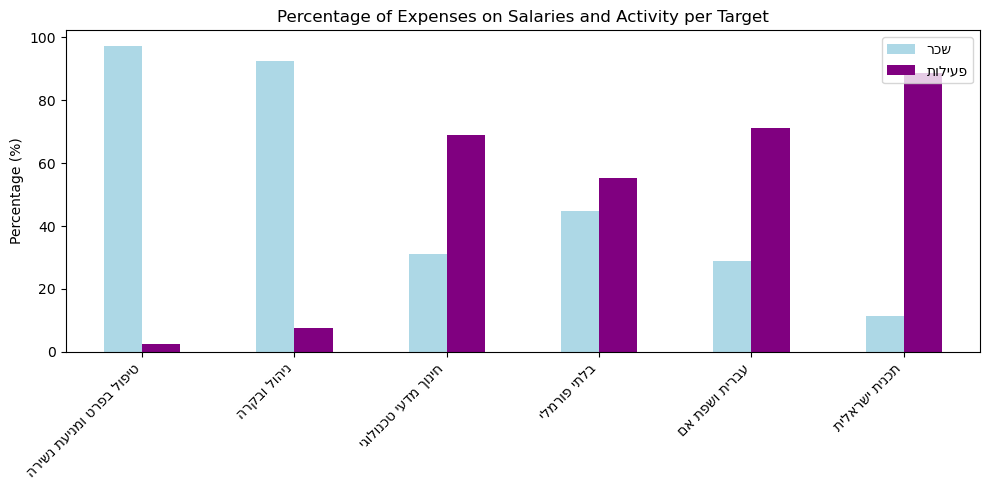

In [42]:
# I had difficulty displaying the target names in Hebrew correctly, so I will create a helper column that contains the target names in reverse order,
# so that when the chart is created, they will be displayed correctly:
invoices['Target_Reversed'] = invoices['Target'].str[::-1]

# Summing up salary and activity expenses by target:
df_merged = invoices.groupby(['Target_Reversed', 'Salaries_Or_Activity'])['Price_Includes_Overhead'].sum().unstack(fill_value=0)

# Calculating the percentages of salary and activity expenses:
df_merged['Salaries_Percentage'] = (df_merged['שכר'] / (df_merged['שכר'] + df_merged['פעילות'])) * 100
df_merged['Activity_Percentage'] = (df_merged['פעילות'] / (df_merged['שכר'] + df_merged['פעילות'])) * 100

# Creating a bar chart:
df_merged[['Salaries_Percentage', 'Activity_Percentage']].plot(kind='bar', stacked=False, color=['lightblue', 'purple'], figsize=(10, 5))

# Setting titles and labels:
plt.title('Percentage of Expenses on Salaries and Activity per Target')
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.legend(labels=['רכש', 'תוליעפ'], loc='upper right') 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

It can be seen that for the targets "טיפול בפרט ומניעת נשירה" and "ניהול ובקרה", over 90% of the expenses are for salaries, with little spent on activities.\
In contrast, in the "תכנית ישראלית" about 90% of the expenses are for activities, not salaries.\
For the other targets, there are expenses for both- salaries and activities, but still, more is spent on activities than on salaries

### **Question number 2:**
Which months have the highest expenses, when we will need more cash flow?

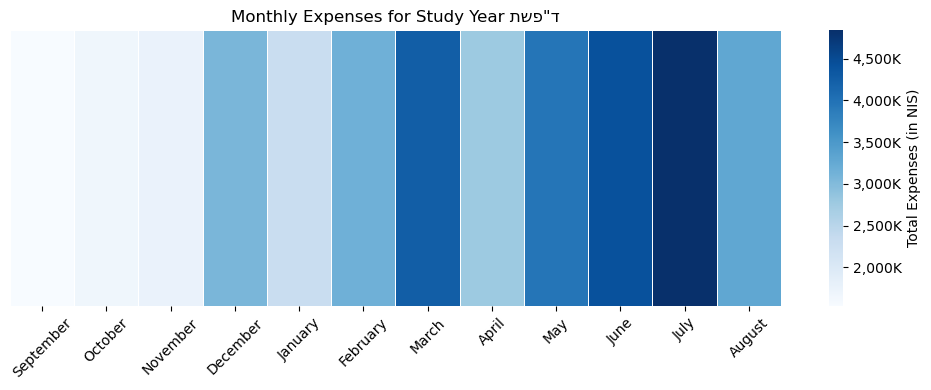

In [45]:
# To answer this question, I will analyze the data for the academic year תשפ"ד only, as this is the complete year available in the data.
df_filtered = invoices[invoices['Study_Year'] == 'תשפ"ד']

#Since the amounts in the data are large, I will create a format to display millions as thousands:
from matplotlib.ticker import FuncFormatter
format_y = FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x / 1000))

# Defining the order of months according to the academic year - the first month is September:
month_order = ['September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

# Calculating the total expenses for each month:
monthly_expenses = df_filtered.groupby('Month_Name')['Price_Includes_Overhead'].sum()

# Sorting the monthly_expenses DataFrame according to the academic year's month order:
monthly_expenses = monthly_expenses[month_order]

# Creating a heatmap:
plt.figure(figsize=(10, 4))
heatmap = sb.heatmap([monthly_expenses], annot=False, cmap='Blues', cbar_kws={'label': 'Total Expenses (in NIS)'},
                     linewidths=0.5, xticklabels=monthly_expenses.index, yticklabels=[])

# Adding title and labels
plt.title('Monthly Expenses for Study Year תשפ"ד')
plt.xlabel('')
plt.xticks(rotation=45)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(format_y)
plt.tight_layout()
plt.show()


From the chart, it is clear that the month with the highest expenses is July. March and June also have high expenses compared to the other months of the year.\
The months with the lowest expenses are the first three months of the year.\
To learn more about the cash flow needs throughout the year, I will present the total expenses split into salaries and activities:

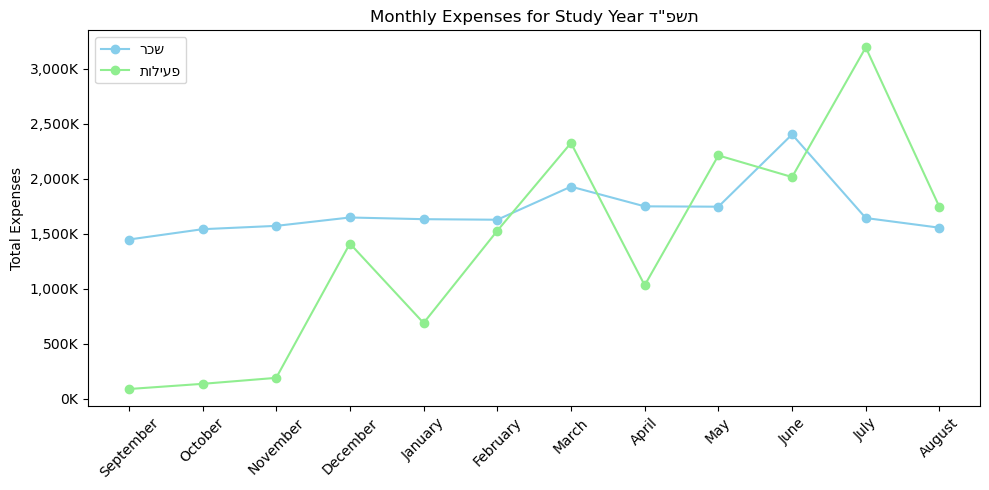

In [47]:
# Calculation of all salary expenses for each month:
salaries_expenses = df_filtered[df_filtered['Salaries_Or_Activity'] == 'שכר'].groupby('Month_Name')['Price_Includes_Overhead'].sum()

# Calculation of all activity expenses for each month:
activity_expenses = df_filtered[df_filtered['Salaries_Or_Activity'] == 'פעילות'].groupby('Month_Name')['Price_Includes_Overhead'].sum()

# Sorting the monthly_expenses DataFrame according to the academic year's month order:
salaries_expenses = salaries_expenses[month_order]
activity_expenses = activity_expenses[month_order]

# Creating a chart with two lines - one for salaries and one for activity:
plt.figure(figsize=(10, 5)) 
plt.plot(salaries_expenses.index, salaries_expenses, marker='o', color='skyblue', label='Salaries')
plt.plot(activity_expenses.index, activity_expenses, marker='o', color='lightgreen', label='Activity')

# Setting titles and labels:
plt.title('Monthly Expenses for Study Year ד"פשת')
plt.xlabel('')
plt.ylabel('Total Expenses')
plt.gca().yaxis.set_major_formatter(format_y) # Defining the format for the Y-axis
plt.xticks(rotation=45)
plt.legend(labels=['רכש', 'תוליעפ'],loc='upper left')
plt.tight_layout()
plt.show()

From the blue line, which represents the salary expenses, we can see that there are no major changes throughout the year.\
The only month with an increase in expenses is June. The reason for this is the payment of vacation pay to employees, which is paid every year in June.

From the green line, which represents the activity expenses, we can see that there are changes throughout the year.\
It is clear that in the first three months of the year, there are very few activity expenses, It probably takes time for all the activities to start.\
In December, there is a small increase because it's the end of the first quarter of the academic year, most activities have already started and there are suppliers who need to be paid their first payment of the year.
In March, there is a noticeable rise because Ramadan happened this month in this academic year. This explains the increase in expenses. It is important to remember that Ramadan doesn't always fall on the same dates each year, so the need for cash flow in March depends on when Ramadan happens.
The highest expenses appear at the end of the year, in June and July, at the start of the summer break. There are summer camps, activities, and final payments to suppliers for the past year.

### **Question number 3:**
Which project managers submit invoices on time and which ones need to improve?

C:\Users\אלביליה\AppData\Local\Temp\ipykernel_14156\822706441.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)


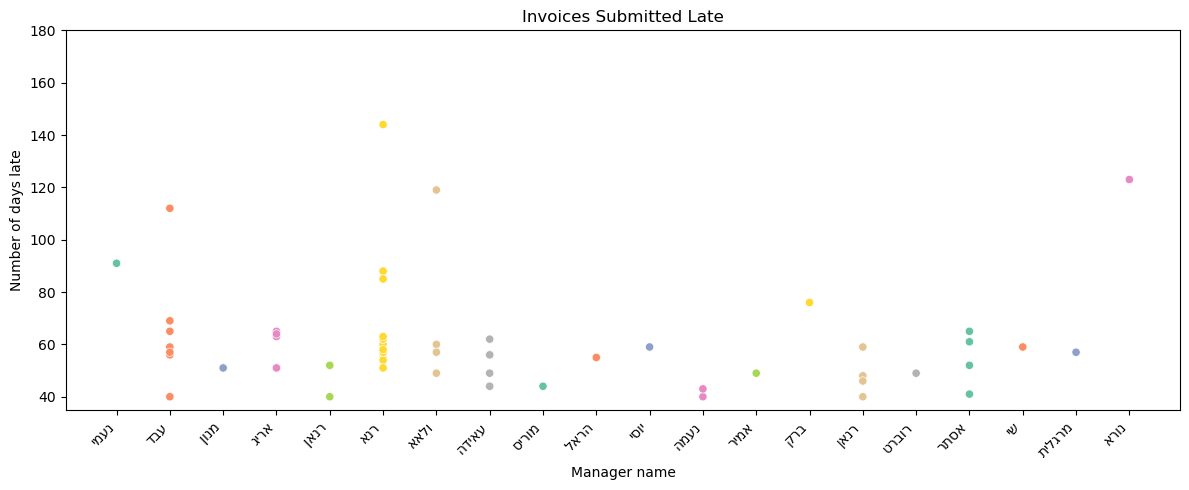

In [50]:
# Creating a column that calculates the difference in days between the invoice submission date and the invoice month:
invoices['Days_Difference'] = (invoices['Received_Date'] - invoices['Invoice_Month']).dt.days

# Data filtering: Show only invoices submitted after 40 days, but not more than 180 days:
invoices_filtered = invoices[(invoices['Days_Difference'] >= 40) & (invoices['Days_Difference'] <= 180)]

# Filtering out בתיה, לביא, and מנון because they submit their invoices according to our request, based on the cash flow:
invoices_filtered = invoices_filtered[~invoices_filtered['Received_From'].isin(['בתיה', 'לביא', 'מנון'])]

# Creating a helper column here as well, that contains the "Received_From" names in reverse order,
# so that when the chart is created, they will be displayed correctly:
invoices_filtered['Reversed_Received_From'] = invoices_filtered['Received_From'].str[::-1]

# Creating a scatter plot:
plt.figure(figsize=(12, 5))
sb.scatterplot(data=invoices_filtered, x='Reversed_Received_From', y='Days_Difference', hue='Reversed_Received_From', palette='Set2', legend=None)

# Set the Y-axis so that the numbers start from 40 with intervals of 20:
plt.yticks(range(40, 181, 20))

# Setting titles and labels:
plt.title('Invoices Submitted Late')
plt.xlabel('Manager name')
plt.ylabel('Number of days late')
plt.xticks(rotation=45, ha='right') 
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()

From the chart, it is clear that most of the managers submit their invoices on time.\
However, there are a few managers who need to improve – Rana, Abed and Arij.

### **Question number 4:**
How much cash do we currently have in work orders compared to the invoices we need to pay?

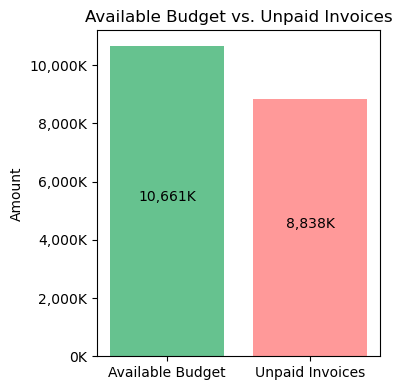

In [53]:
# Filtering the invoices that have not been paid (status different from "עבר להנה"ח" and "בחתימות"):
unpaid_invoices = invoices[~invoices['Status'].isin(['עבר להנה"ח', 'בחתימות'])]

# Summing the total amounts of the unpaid invoices:
unpaid_invoices_total = unpaid_invoices['Price_Includes_Overhead'].sum()

# Summing the remaining budget from the work orders:
available_budget = work_orders['Budget_Balance'].sum()

# Creating a bar chart:
plt.figure(figsize=(4, 4))
bars= plt.bar(['Available Budget', 'Unpaid Invoices'], [available_budget, unpaid_invoices_total], color=['#66c28f', '#ff9999'])

# Adding the amounts as text inside each bar:
for bar in bars:
    height = bar.get_height()
    formatted_height = format_y(height) 
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, formatted_height, ha='center')
    
# Setting titles and labels:
plt.title('Available Budget vs. Unpaid Invoices')
plt.ylabel('Amount')
plt.gca().yaxis.set_major_formatter(format_y) # Defining the format for the Y-axis
plt.tight_layout()
plt.show()

It can be seen from the chart that there is currently a total of 8,838K NIS that need to be paid.\
In the work orders, there is an available amount of 10,661K NIS.\
There is enough money to pay the existing invoices, but it is best to open another work order soon because less than two million NIS are remaining

### **Question number 5:**
How much of the total annual cost of the entire program in the current academic year is funded by the Ministry of Education, and how much is covered by the Jerusalem Municipality?

I will present this data both as percentages and in amounts:

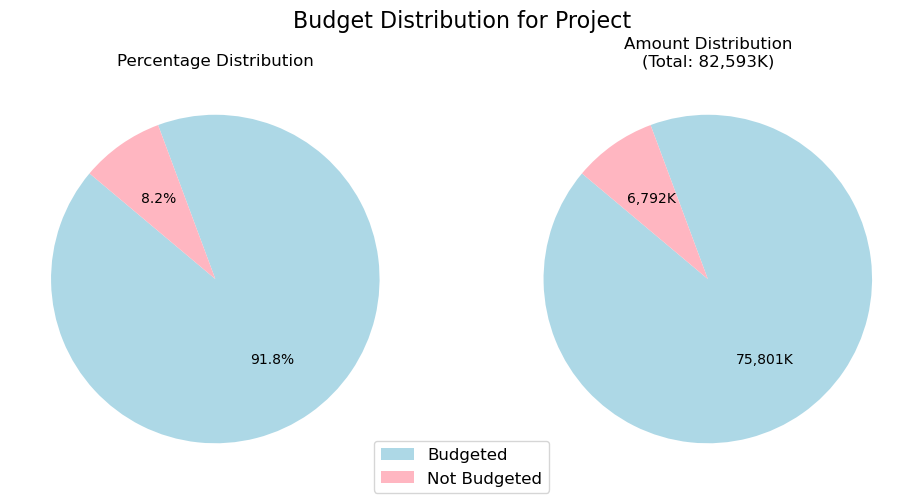

In [56]:
# Calculating the annual cost of all projects, the part funded by the Ministry of Education, and the part not funded:
total_annual_cost = Projects['Annual_Cost'].sum()
budgeted_by_moed = Projects['Budgeted_By_MOEd'].sum()
not_budgeted = Projects['Not_Budgeted'].sum()

# Creating a canvas with 2 charts:
fig = plt.figure(figsize=(10, 5)) 
Budget = fig.subplots(1, 2)

# Pie chart 1 - Percentage Distribution:
colors= ['lightblue', '#FFB6C1']
values= [budgeted_by_moed, not_budgeted]
Budget[0].pie(values, autopct='%1.1f%%', startangle=140, colors=colors)
# Pie chart 2 - Amount Distribution:
Budget[1].pie(values, autopct=lambda p: format_y(p * total_annual_cost / 100), startangle=140, colors=colors)

# Setting titles and labels:
fig.suptitle('Budget Distribution for Project', fontsize=16)
Budget[0].set_title('Percentage Distribution') 
total_formatted = format_y(total_annual_cost) # Creating a variable that contains the total annual cost in thousands
Budget[1].set_title(f'Amount Distribution\n(Total: {total_formatted})')
fig.legend(['Budgeted', 'Not Budgeted'], loc='lower center', fontsize=12)

plt.tight_layout()
plt.show()

The chart shows that 91.8% of the program's annual cost (75.8 million NIS) is covered by funding, and the Jerusalem Municipality gets reimbursed for the expenses.\
8.2% of the expenses are covered by the municipality itself, which equals 6.8 million NIS.

## PART 5- Conclusions and suggestions for further research


I worked as the operations coordinator for the Five-Year Program in East Jerusalem for two years, so I know the program well.\
In the previous five-year period, the data was not organized, so it was impossible to do research and analysis on it.\
During my time as coordinator, I worked on new files that had accurate records of invoices, projects, budgets, reports, and other important information.\
Now, with the organized data (for the last year and a half), I was able to get some useful insights about the program:
1. We learned about the division between salaries and activities. The business meaning is related to payments – salaries are paid to employees through the Lavy organization, and we reimburse them, while payments to suppliers are made only after the activity and after receiving the original invoice. This affects how we make payments based on cash flow.
2. We learned which months have higher expenses, so we can prepare accordingly with the cash flow.
3. We found  the managers who need a warning for submitting invoices late. It will be interesting to check later if they have improved.
4. We checked our current cash flow and how much we need to pay now. We have enough money, but we need to open more work orders soon.
5. We saw the amount that the Jerusalem Municipality does not get reimbursed from the Ministry of Education. The Education Administration of the Jerusalem Municipality needs to consider this amount as part of the annual work plan.
   
I would be happy to do another study in a year and a half when we will have data for three years. This will help us better understand the trends and impact of the program, and maybe we can even add breakdowns by neighborhood and institution.